# Binary Classification: Telcom company Customer Churn Classification
## Problem Statement :

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth!

## Aim :
- To classify the potential churn customers based on numerical and categorical features.
- It is a **binary classification** problem for an imbalanced dataset.

## Dataset Attributes
    
- **customerID** : Customer ID
- **gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
- **Partner** : Whether the customer has a partner or not (Yes, No)
- **Dependents** : Whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned or not (Yes or No)

# Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
file_path = 'dataset/train.csv'
df = pd.read_csv(file_path)

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9313-QOLTZ,Male,0,No,No,26,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,518.3,No
1,6654-QGBZZ,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,19.9,No
2,6877-LGWXO,Male,1,Yes,No,18,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,78.55,1422.65,Yes
3,8020-BWHYL,Female,1,No,No,15,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.30,1147.45,Yes
4,3594-IVHJZ,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,42.45,No


# Questions
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

## Question 1 : Data Analysis (10 pt)
Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

Display the statistical values for each of the attributes, of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Analyze and discuss the relationships between the data attributes, and between the data attributes and label.

Analyze the relationship between all the features. Use appropriate visualization techniques.

In [4]:
# Summarizing the data: number of rows (data points) and columns (features)
data_summary = {
    "Number of Data Points": df.shape[0],
    "Number of Features": df.shape[1]
}

data_summary

{'Number of Data Points': 6338, 'Number of Features': 21}

**Data Summary**:
- Number of Data Points: 6338
- Number of Features: 21

In [5]:
# Identifying continuous and categorical attributes
continuous_attributes = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_attributes = df.select_dtypes(include=['object']).columns.tolist()

continuous_attributes, categorical_attributes

(['SeniorCitizen', 'tenure', 'MonthlyCharges'],
 ['customerID',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'TotalCharges',
  'Churn'])

**Attributes Classification**:
- Continuous Attributes: 'SeniorCitizen', 'tenure', 'MonthlyCharges'
- Categorical Attributes: 'customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'

In [6]:
# Displaying statistical values for each of the attributes
statistical_summary = df.describe(include='all').transpose()

statistical_summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,6338,6338,9313-QOLTZ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,6338,2,Male,3221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,6338.0,NaN,NaN,NaN,0.161723,0.368226,0.0,0.0,0.0,0.0,1.0
Partner,6338,2,No,3270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,6338,2,No,4440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,6338.0,NaN,NaN,NaN,32.35863,24.537141,0.0,9.0,29.0,55.0,72.0
PhoneService,6338,2,Yes,5717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,6338,3,No,3034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,6338,3,Fiber optic,2774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,6338,3,No,3155,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Statistical Summary**:
- The continuous attributes such as 'tenure', 'MonthlyCharges' show a wide range of values, suggesting variability in customer engagement and billing amounts.
- 'SeniorCitizen' is a binary attribute indicating whether the customer is a senior citizen or not.
- Categorical attributes like 'gender', 'Partner', 'Dependents' provide insights into the demographic distribution of the customers.
- 'TotalCharges' appears to be treated as a categorical variable due to its datatype, but it should be a continuous variable, indicating a need for special treatment to convert it from a string to a numeric type.

In [7]:
# Checking for missing values
missing_values = df.isnull().sum()

missing_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Notable Traits and Special Treatment**:
- 'TotalCharges' has entries that are not immediately numeric, indicated by its absence in the continuous attributes list. It needs to be converted to a float type, handling any non-numeric values appropriately (e.g., blank strings should be converted to NaN).
- There are no missing values in the dataset based on the initial check. However, the 'TotalCharges' field has 11 instances where it is blank (''), which after conversion to a numeric type might be recognized as missing values.

In [8]:
# Converting 'TotalCharges' from object to numeric, setting errors='coerce' to handle any conversion errors by setting them to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now, let's recheck the missing values after this conversion
missing_values_updated = df.isnull().sum()
missing_values_updated

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After converting `TotalCharges` to a numeric type, we identified *11 missing values* in this attribute, which were previously unrecognizable due to being stored as blank strings.

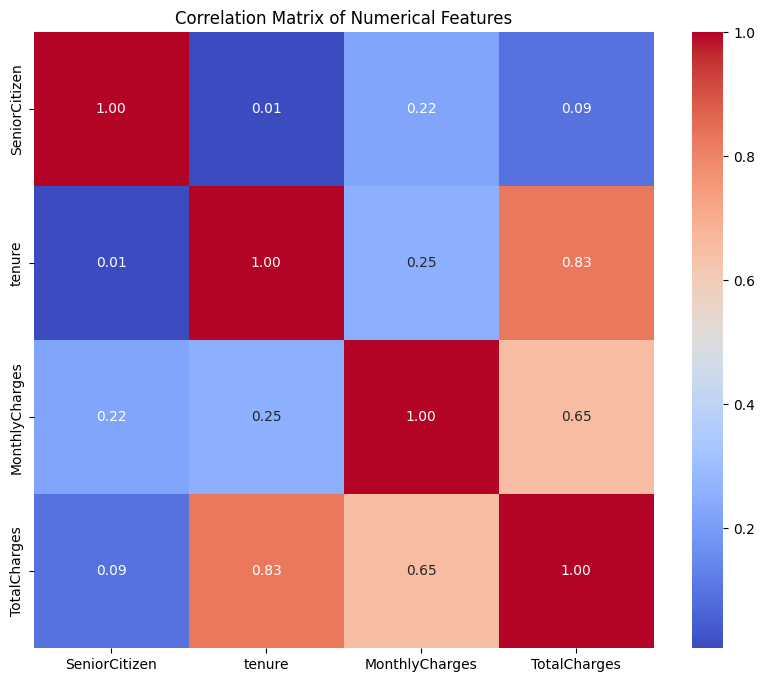

In [9]:
# Selecting only numerical attributes for correlation matrix
numerical_attributes = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Calculating correlation matrix
corr_matrix = df[numerical_attributes].corr()

# Plotting heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Correlation Analysis**:

- A positive correlation between 'tenure' and 'TotalCharges' (0.83), indicating that customers with longer tenure tend to have higher total charges, which is intuitive as charges accumulate over time.
- 'MonthlyCharges' and 'TotalCharges' also have a strong positive correlation (0.65), suggesting that higher monthly charges lead to higher total charges over time.
- 'SeniorCitizen' has a positive correlation with 'MonthlyCharges' (0.22), hinting that senior citizens may opt for more expensive plans or services that result in higher monthly charges.

**Visualizing the churn rate across different categorical features to better understand customer behavior and potential predictors of churn**

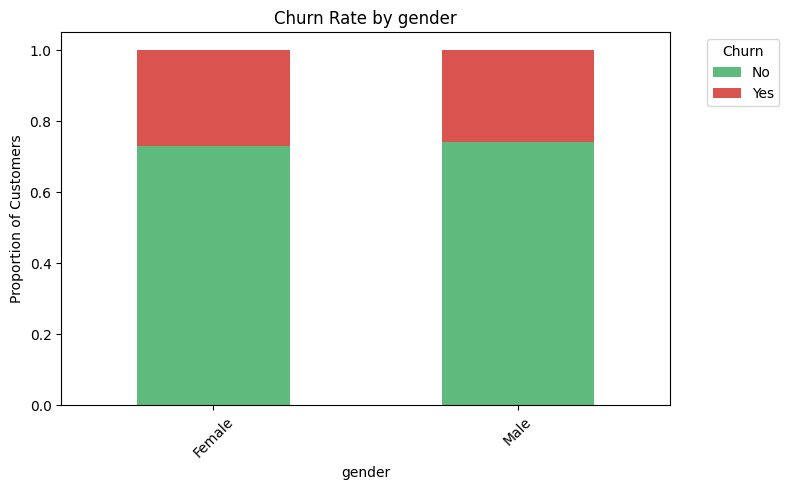

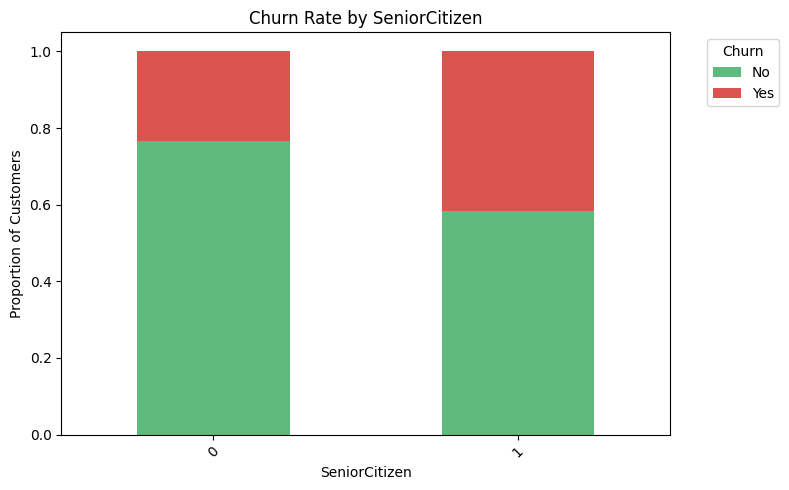

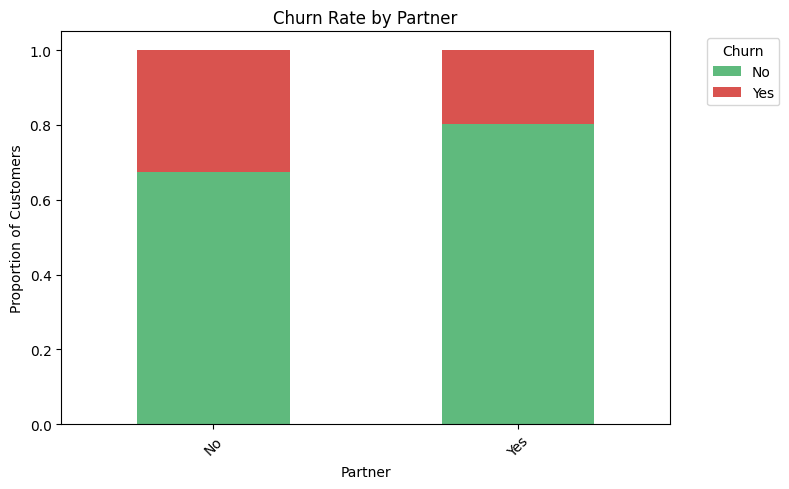

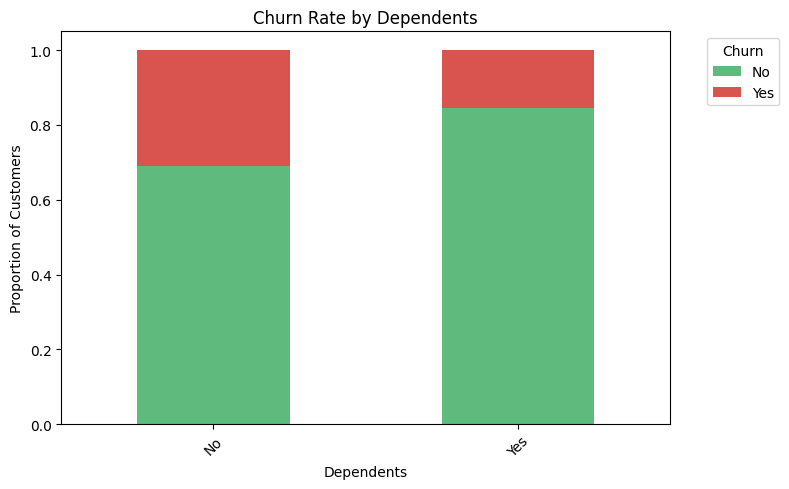

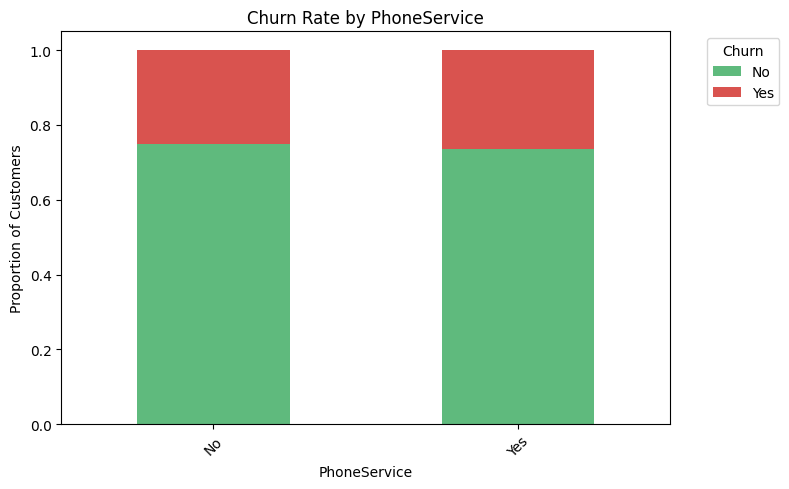

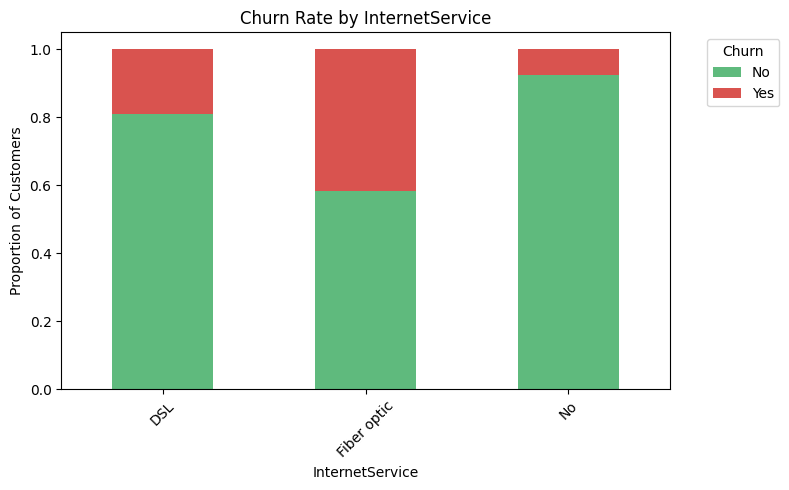

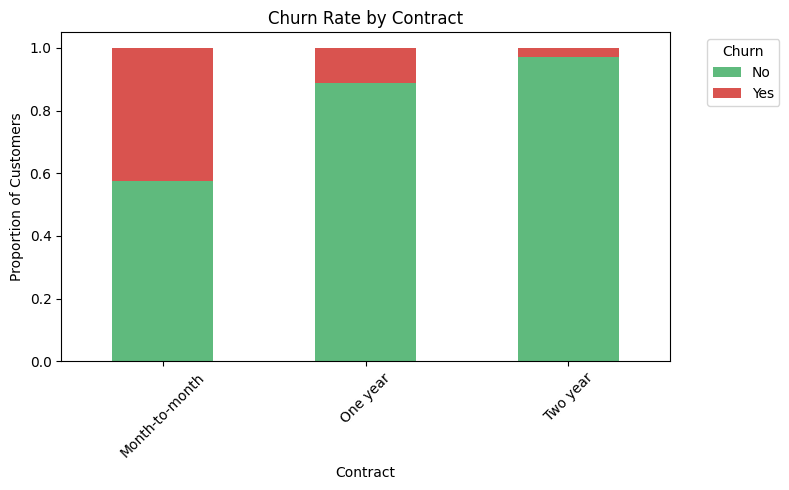

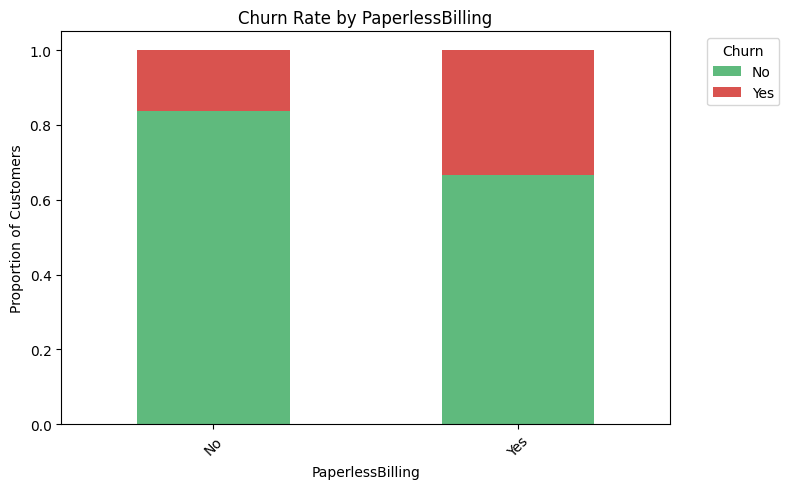

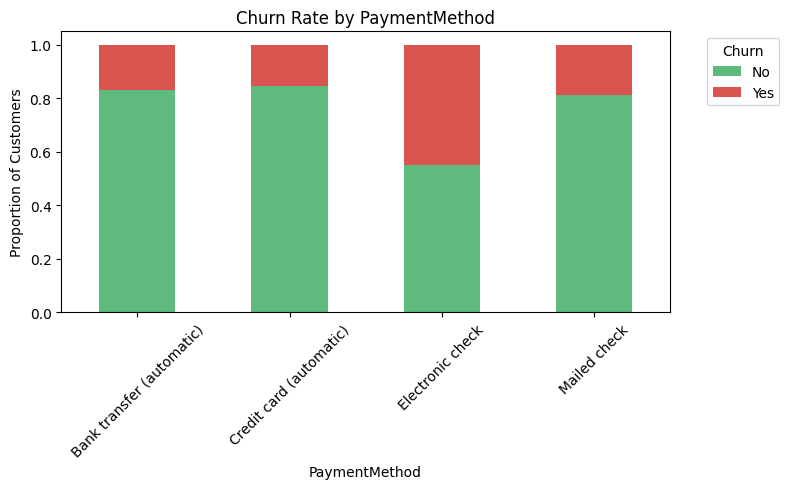

In [10]:
# Defining a function to plot churn rates across different categorical features
def plot_churn_rate_by_category(feature, df):
    """
    Plots the churn rate for a given categorical feature.
    """
    churn_rate = df.groupby(feature)['Churn'].value_counts(normalize=True).unstack()
    churn_rate.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#5fba7d', '#d9534f'])
    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('Proportion of Customers')
    plt.xlabel(feature)
    plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Selecting a subset of categorical features
features_to_visualize = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Plotting churn rates across selected categorical features
for feature in features_to_visualize:
    plot_churn_rate_by_category(feature, df)

**Insights:**

- **Gender:** There appears to be no significant difference in churn rates between male and female customers.
- **Senior Citizen:** Senior citizens have a higher churn rate compared to non-senior citizens, suggesting they might be more sensitive to service quality or pricing.
- **Partner and Dependents:** Customers without partners or dependents tend to churn more than those with partners or dependents. This could indicate that customers with families are looking for stability and are less likely to change their service provider.
- **Phone Service:** There is no significant difference in churn rates between customers with and without phone service.
- **Internet Service:** Customers with fiber optic internet service have a higher churn rate compared to those with DSL or no internet service. This could reflect issues related to cost or quality of the fiber optic service.
- **Contract:** Customers on month-to-month contracts have a much higher churn rate compared to those on one-year or two-year contracts, indicating that long-term contracts might be an effective retention tool.
- **Paperless Billing:** Customers with paperless billing show a higher churn rate, which could be associated with a demographic that is more comfortable with changing providers.
- **Payment Method:** Customers who use electronic checks have a higher churn rate compared to other payment methods. This might suggest a correlation between the chosen payment method and the customer's likelihood to churn, possibly reflecting the younger, more tech-savvy demographic's tendency to change providers more frequently.

## Question 2 : Data Pre-processing & Feature Engineering (20 pt)
Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary.

Perform Feature Engineering on the dataset.

**Hint** : Perform few statistical tests (Eg: ANOVA) on the dataset and Data Scaling, Sampling as needed. Based on that, check which columns can be eliminated.

**Hint** : Check for any null values in the dataset and perform necessary actions. Also, encoding categorical columns necessarily.

### Steps

#### 1. **Handling Missing Values:**
- As identified, 'TotalCharges' has 11 missing values after converting it to a numeric type. Given the relatively small number of missing values compared to the dataset size, we have a few options: imputation (replacing missing values with the mean, median, or mode of the column), or removal of these rows. Considering 'TotalCharges' is closely related to 'MonthlyCharges' and 'tenure', using a median or mean for imputation might be a reasonable approach to retain data integrity without introducing bias.
  
#### 2. **Encoding Categorical Variables:**
- Machine learning models require numerical input, so encoding categorical variables is necessary. For nominal data where no ordinal relationship exists, one-hot encoding is appropriate. For ordinal data, label encoding can be applied.

In [11]:
# Handling Missing Values in 'TotalCharges'
# Imputation with the median
total_charges_median = df['TotalCharges'].median()
df['TotalCharges'].fillna(total_charges_median, inplace=True)

1. **Handling Missing Values:** Missing values in 'TotalCharges' were imputed using the median of the column to retain data integrity without introducing bias.

In [12]:
unique_values = {column: df[column].unique() for column in df.columns}
unique_values

{'customerID': array(['9313-QOLTZ', '6654-QGBZZ', '6877-LGWXO', ..., '8044-BGWPI',
        '7450-NWRTR', '4795-UXVCJ'], dtype=object),
 'gender': array(['Male', 'Female'], dtype=object),
 'SeniorCitizen': array([0, 1], dtype=int64),
 'Partner': array(['No', 'Yes'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'tenure': array([26,  1, 18, 15,  2, 23, 72, 70, 46, 36,  6,  4, 13, 64,  8, 62, 34,
        24, 63, 66, 61, 67, 12, 19,  3, 17, 52, 51,  5, 29, 42, 16, 11, 54,
        30,  9,  0, 10, 56, 45, 69, 21, 20,  7, 37, 38, 49, 14, 71, 58, 48,
        50, 25, 35, 59, 22, 40, 60, 53, 55, 65, 41, 47, 44, 68, 39, 33, 28,
        32, 57, 31, 43, 27], dtype=int64),
 'PhoneService': array(['Yes', 'No'], dtype=object),
 'MultipleLines': array(['No', 'Yes', 'No phone service'], dtype=object),
 'InternetService': array(['No', 'Fiber optic', 'DSL'], dtype=object),
 'OnlineSecurity': array(['No internet service', 'No', 'Yes'], dtype=object),
 'OnlineBackup': array(['No interne

**Analysis of Columns**:

1. *Non-Ordinal Data:* Many of the categorical columns such as `gender`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, and `Churn` are binary (Yes/No) and do not have an inherent order, indicating **nominal data**.

2. *Potential Ordinal Data:* The `Contract` column with values `['Month-to-month', 'Two year', 'One year']` suggests a potential order from shortest to longest commitment, indicating **ordinal data**. Similarly, the `PaymentMethod` might imply ordinality based on the mode of payment, though it's typically considered nominal as there's no inherent ranking.

3. *Mixed Data:* Columns like `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies` show categories that are a mix of service options (Yes/No) and service availability (`No internet service`/`No phone service`), which might suggest a blend of nominal and special status data.

**Encoding Strategy**:

- *One-hot Encoding* for most categorical features to maintain the integrity of nominal data without introducing artificial ordinality. This approach is flexible and widely supported across different models and scenarios.
  
- *Manual Mapping* for `Contract` and `PaymentMethod`, ensuring clarity in the ordinal relationship and ease of reuse for encoding similar test dataset columns.

In [13]:
# Define mappings for 'Contract' and 'PaymentMethod'
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
payment_method_mapping = {
    'Mailed check': 0,
    'Electronic check': 1,
    'Credit card (automatic)': 2,
    'Bank transfer (automatic)': 3,
}

# Apply mappings
df['Contract'] = df['Contract'].map(contract_mapping)
df['PaymentMethod'] = df['PaymentMethod'].map(payment_method_mapping)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encoding the rest of the categorical variables excluding 'customerID' and 'Churn'
categorical_features_to_one_hot_encode = list(set(categorical_attributes) - {'customerID', 'Contract', 'PaymentMethod', 'Churn', 'TotalCharges'})

# Applying one-hot encoding
df = pd.get_dummies(df, columns=categorical_features_to_one_hot_encode)

df.head()

,customerID,SeniorCitizen,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Dependents_No,Dependents_Yes,...,gender_Female,gender_Male,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Partner_No,Partner_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,9313-QOLTZ,0,26,0,0,20.90,518.30,0,True,False,...,False,True,False,True,False,True,False,False,True,False
1,6654-QGBZZ,0,1,0,0,19.90,19.90,0,True,False,...,True,False,False,True,False,True,False,False,True,False
2,6877-LGWXO,1,18,0,1,78.55,1422.65,1,True,False,...,False,True,True,False,False,False,True,True,False,False
3,8020-BWHYL,1,15,0,2,75.30,1147.45,1,True,False,...,True,False,True,False,False,True,False,False,False,True
4,3594-IVHJZ,0,2,0,0,20.45,42.45,0,True,False,...,True,False,False,True,False,True,False,False,True,False


2. **Encoding Categorical Variables:** 
   - 'Contract' and 'PaymentMethod' were encoded using manual encoding.
   - The rest of the categorical variables, except for 'customerID' (which will be excluded from the modeling) and 'Churn' (our target variable), were one-hot encoded. This process expanded the dataset to include binary columns for each category of the nominal variables.
   - 'Churn', being the binary target variable, was manually encoded.

#### 3. **Feature Selection:**
- Not all features may be relevant for predicting churn. Statistical tests, such as ANOVA for continuous variables and Chi-squared tests for categorical variables, can help identify the most significant features. Features with little to no statistical significance can be considered for elimination.
  
#### 4. **Feature Engineering:**
- Creating new features that might be more predictive of churn than the existing ones. For example, deriving a feature that captures the ratio of 'TotalCharges' to 'tenure' might provide insight into customer loyalty and satisfaction.

In [14]:
# Feature Engineering
# This feature represents the average amount charged per month over the customer's tenure
df['AverageMonthlyCharges'] = df['TotalCharges'] / df['tenure']
df['AverageMonthlyCharges'].replace([np.inf, -np.inf], 0, inplace=True)

4. **Feature Engineering**:
- Introducing new features like "AverageMonthlyCharges" can provide additional relevant information to the model, potentially uncovering patterns not visible through the original features alone, thus improving the model's accuracy and performance.
- Feature engineering allows for the inclusion of domain-specific knowledge into the modeling process, enabling the creation of more sophisticated models that reflect real-world scenarios and behaviors more accurately.

In [15]:
# Separate features and target variable for feature selection
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Apply Chi-squared test for categorical variables
# Selecting top k categorical features based on chi-squared test
chi2_selector = SelectKBest(chi2, k='all')
X_kbest_chi2 = chi2_selector.fit_transform(X, y)

# Getting scores for each feature
chi2_scores = chi2_selector.scores_

# Apply ANOVA F-test for continuous variables
# Using SelectKBest to select features with highest ANOVA F-test scores
anova_selector = SelectKBest(f_classif, k='all')
X_kbest_anova = anova_selector.fit_transform(X, y)

# Getting scores for each feature
anova_scores = anova_selector.scores_

# Combining scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'ANOVA Score': anova_scores}).sort_values(by='Chi2 Score', ascending=False)
feature_scores.head(10)

,Feature,Chi2 Score,ANOVA Score
5,TotalCharges,544669.182878,251.281045
1,tenure,14169.875643,865.455676
40,AverageMonthlyCharges,3313.960776,241.515669
4,MonthlyCharges,3256.282835,240.653247
2,Contract,986.313627,1165.577040
19,OnlineSecurity_No,368.109962,828.574006
32,TechSupport_No,349.916773,775.991630
9,InternetService_Fiber optic,330.002046,646.535030
37,OnlineBackup_No,253.628546,483.687779
17,DeviceProtection_No internet service,252.315167,339.514950


3. **Feature Selection Results**:
- *Top Features by Chi-squared Test:*
   - 'TotalCharges' shows the highest Chi-squared score, indicating its strong association with the target variable 'Churn'.
   - 'tenure' and 'MonthlyCharges' also show high scores, underscoring their importance in predicting churn.
   - 'Contract' has a significant score, suggesting the type of contract influences churn likelihood.

- *Top Features by ANOVA F-test:*
   - 'Contract' appears as a highly significant feature, with the highest ANOVA score, indicating its strong relationship with churn.
   - 'tenure' and 'OnlineSecurity_No' also show high ANOVA scores, further emphasizing their predictive value for churn.

#### 5. **Scaling Numerical Features:**
- Since the range of values in numerical columns varies widely, scaling these features to a common scale without distorting differences in the ranges of values is important. This ensures that all features contribute equally to the model. Techniques like standardization (z-score normalization) or Min-Max scaling can be applied.

In [16]:
# Scaling Numerical Features
# Using Min-Max scaling to bring all values into the range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

5. **Scaling Numerical Features**:

- All numerical features ('SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges') have been scaled using Min-Max scaling to ensure they contribute equally to the model, bringing their values into the range [0, 1].

#### 6. **Dimensionality Reduction:**
- If the dataset is high-dimensional, techniques like PCA (Principal Component Analysis) can be used to reduce the number of features while retaining most of the information. This can improve model training times and help mitigate overfitting.

In [17]:
# Checking the balance of the target variable 'Churn'
churn_balance = df['Churn'].value_counts(normalize=True)

churn_balance

Churn
0    0.735721
1    0.264279
Name: proportion, dtype: float64

The dataset shows that approximately 73.6% of customers have not churned ('Churn' = 0), while about 26.4% have churned ('Churn' = 1). This indicates a somewhat imbalanced dataset but I thought sampling is not needed.

In [18]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [19]:
X_pca

array([[ 2.7361829 , -0.69211382, -0.42984358, ..., -0.02724614,
        -0.0321173 , -0.07941981],
       [ 2.73972512, -0.76667611, -0.46229514, ...,  0.00904387,
        -0.02563845, -0.07560247],
       [-0.64682639, -0.78954942, -0.21978029, ..., -1.13161536,
         0.90611107, -0.24374867],
       ...,
       [ 2.56954717,  0.19808722, -0.20967846, ...,  0.12121814,
         0.07122492, -0.07882595],
       [-1.24840032, -0.02556622, -1.60946867, ...,  0.38544446,
        -0.04565845,  0.07466363],
       [ 2.75818243, -0.50443947, -0.37333018, ..., -0.08067139,
        -0.03076313, -0.04092963]])

6. **Dimensionality Reduction**:
- By lowering the number of features, dimensionality reduction significantly decreases the computational demands required for model training, which can lead to faster training times and less memory usage.
- Reducing the dimensionality of the data helps in avoiding overfitting by simplifying the model. This ensures that the model does not learn noise and irrelevant details in the training data, improving its generalization to unseen data.

In [20]:
# Here's a summary of the dimensions after PCA
pca_summary = {
    "Original Features": X_scaled.shape[1],
    "Reduced Features after PCA": X_pca.shape[1],
    "Explained Variance Ratio": np.sum(pca.explained_variance_ratio_)
}

pca_summary

{'Original Features': 41,
 'Reduced Features after PCA': 14,
 'Explained Variance Ratio': 0.9508037979248993}

**PCA Summary**:
- PCA reduced the dataset from 41 original features to 14 principal components, efficiently summarizing the dataset while retaining 95.08% of its variance. This demonstrates the effectiveness of PCA in capturing the essence of the data with fewer dimensions.
- The successful application of PCA simplifies the dataset, making it more manageable for modeling. It ensures that the model focuses on the most informative aspects of the data, potentially enhancing predictive performance and interpretability.

## Question 3 : Modeling (20 pt)

Train at least three different classifier models (e.g., XGBoost, Random Forest, Decision Tree Classifier etc.) and optimize hyperparameters(Hint : GridsearchCV) to enhance performance.

Implement a validation pipeline utilizing 5-fold cross-validation. For each classifier, report F1 score, Cross-validation score, Precision, Recall, Accuracy). Also, for each model, plot the ROC-AUC curve.

Then, combine your classifiers into an ensemble that outperforms each individual classifier. Describe and discuss your findings.


In [21]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [22]:
# Defining the models to train
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Hyperparameters grid for each model
param_grids = {
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [10, 20], "min_samples_split": [2, 5]},
    "Gradient Boosting": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1], "max_depth": [3, 5]},
    "Decision Tree": {"max_depth": [10, 20], "min_samples_split": [2, 5]}
}

# Results dictionary
results = {}

In [23]:
# Training and optimizing models using GridSearchCV and 5-fold cross-validation
for name, classifier in classifiers.items():
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Best model
    best_model = grid_search.best_estimator_
    
    # Predictions
    y_pred = best_model.predict(X_test)
    
    # Evaluation metrics
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Cross-validation score
    cv_score = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1').mean()
    
    results[name] = {
        "Best Parameters": grid_search.best_params_,
        "F1 Score": f1,
        "Cross-Validation Score": cv_score,
        "Precision": precision,
        "Recall": recall,
        "Accuracy": accuracy,
        "ROC AUC Score": roc_auc
    }

In [24]:
# Displaying results
results_df = pd.DataFrame(results).transpose()
results_df

,Best Parameters,F1 Score,Cross-Validation Score,Precision,Recall,Accuracy,ROC AUC Score
Random Forest,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.486388,0.494592,0.617512,0.401198,0.776814,0.656166
Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.494662,0.520764,0.609649,0.416168,0.776025,0.660439
Decision Tree,"{'max_depth': 10, 'min_samples_split': 5}",0.419411,0.478659,0.497942,0.362275,0.735804,0.615827


1. **Random Forest**:
- *High Precision, Moderate Recall:* The model has relatively high precision but a moderate recall, indicating it is more conservative in predicting churn; it prioritizes minimizing false positives over capturing all actual churn cases.
- *Strong Balance Between Accuracy and ROC AUC:* Exhibits a good balance between overall accuracy and ROC AUC score, suggesting it effectively differentiates between the classes across different thresholds but may benefit from further tuning to improve sensitivity (recall).

2. **Gradient Boosting**:
- *Improved F1 and Recall Over Random Forest:* Shows a slight improvement in F1 score and recall compared to Random Forest, indicating better performance in identifying churn cases but at a slight cost to precision.
- *Highest ROC AUC Score:* Achieves the highest ROC AUC score among the three models, which indicates the best ability to distinguish between churned and retained customers across all decision thresholds.

3. **Decision Tree**:
- *Lower Performance Across Metrics:* Has the lowest F1 score and accuracy among the models, reflecting its simplicity and limitations in handling complex patterns without overfitting.
- *Precision and Recall:* Precision and recall, showing a limited performance in predicting churn accurately, indicating potential overfitting to the training data or undercomplexity for the problem at hand.

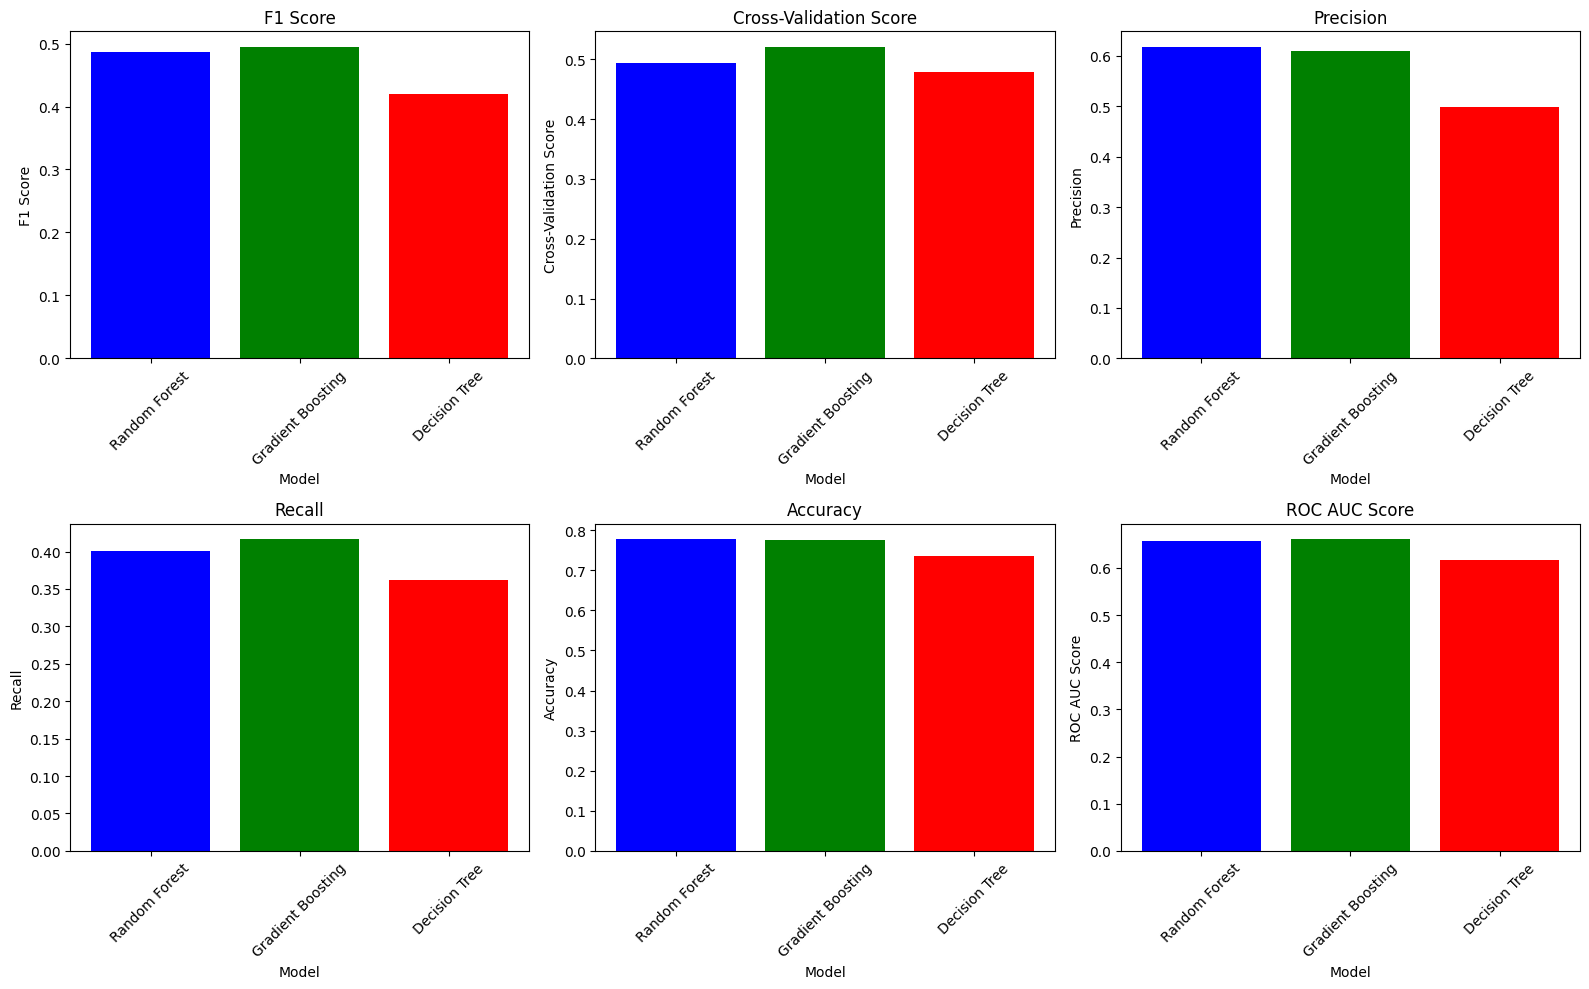

In [25]:
metrics = ['F1 Score', 'Cross-Validation Score', 'Precision', 'Recall', 'Accuracy', 'ROC AUC Score']
model_names = results_df.index
data_for_plotting = {metric: results_df[metric] for metric in metrics}

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].bar(model_names, data_for_plotting[metric], color=['blue', 'green', 'red'])
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()

## Question 4 : Evaluation and Reporting(20 pt)

Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions


In [26]:
# This function is from hint at last section:
def evaluation_metrics(y_test, y_pred):
    # Calculate the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    return balanced_accuracy

In [27]:
# Selecting the best model based on F1 Score and ROC AUC Score
best_model_name = None
best_model_score = 0

for model_name, metrics in results.items():
    # Combining F1 and ROC AUC Score for a comprehensive evaluation
    score = metrics["F1 Score"] + metrics["ROC AUC Score"]
    if score > best_model_score:
        best_model_name = model_name
        best_model_score = score

# Assigning the best model to final_model variable
final_model = classifiers[best_model_name].set_params(**results[best_model_name]["Best Parameters"])

# Train the final model on the full training dataset
final_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [28]:
# Predict on X_test
y_pred = final_model.predict(X_test)

balanced_accuracy = evaluation_metrics(y_test, y_pred)
print(f"Balanced Accuracy Score: {balanced_accuracy}")

Balanced Accuracy Score: 0.6604392927207683


Based on the provided results and insights, the **Gradient Boosting Classifier** appears to be the most promising model for predicting customer churn for several reasons:

1. **Highest ROC AUC Score:** With the highest ROC AUC score, the Gradient Boosting Classifier demonstrates the best ability among the evaluated models to distinguish between the classes (churned vs. retained customers) across different thresholds. This suggests that it can more accurately predict customer churn.

2. **Balanced Precision and Recall:** The model exhibits a balanced combination of precision and recall, indicating it is effective in identifying true positives while maintaining a reasonable rate of false positives. This balance is crucial in applications like churn prediction, where both catching as many true churn cases as possible (recall) and minimizing false churn predictions (precision) are important.

## Question 5 : External validation (30 pt)

A dataset named ‘test.csv’ is provided to you in which the label is hidden. You have to choose the best model(the model which has the highest score) and then use that model to predict the label on the ‘test.csv’.

After prediction, you will get an array of 0’s and 1’s. Convert that array to csv file, name it as ‘submission.csv’ and submit that ‘submission.csv’ file.

In [38]:
# Load the test data
test_df = pd.read_csv('dataset/test.csv')
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
1,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
2,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70
3,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
4,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10


In [39]:
# Preprocessing the test data

# Calculate median
total_charges_test_median = test_df['TotalCharges'].median()

# Impute 'TotalCharges' missing values with median
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')
test_df['TotalCharges'].fillna(total_charges_test_median, inplace=True)

In [40]:
# Apply label mappings for 'Contract' and 'PaymentMethod' from the training set
test_df['Contract'] = test_df['Contract'].map(contract_mapping)
test_df['PaymentMethod'] = test_df['PaymentMethod'].map(payment_method_mapping)

In [41]:
# New Feature
test_df['AverageMonthlyCharges'] = test_df['TotalCharges'] / test_df['tenure']
test_df['AverageMonthlyCharges'].replace([np.inf, -np.inf], 0, inplace=True)

In [42]:
# One-hot encoding for categorical variables
test_df = pd.get_dummies(test_df, columns=categorical_features_to_one_hot_encode)

In [43]:
# Ensuring test data has the same feature columns as the training data,
missing_cols = set(X.columns) - set(test_df.columns)
for c in missing_cols:
    test_df[c] = 0

In [44]:
missing_cols

set()

In [45]:
# Order the test dataframe according to the training dataframe
test_df = test_df[X.columns]

# Scaling the test data features
X_test_scaled = scaler.transform(test_df)

# Reduce the dimension using PCA
X_test_pca = pca.fit_transform(X_test_scaled)

In [46]:
# Make predictions with the final model
predictions = final_model.predict(X_test_pca)

# Save output as csv file
predictions_df = pd.DataFrame(predictions, columns=['Churn'])
predictions_df.to_csv('dataset/submission.csv', index=False)

In [47]:
# Checking the balance of the variable 'Churn'
churn_balance_submission = predictions_df['Churn'].value_counts(normalize=True)

churn_balance_submission

Churn
0    0.795745
1    0.204255
Name: proportion, dtype: float64

## Hint - Final evaluation metrics
Please use the below function named 'model_evaluation' in order to calculate the evaluation metrics.

In [ ]:
from sklearn.metrics import balanced_accuracy_score

def evaluation_metrics(y_test, y_pred):
    # Calculate the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    return balanced_accuracy